In [ ]:
#Submitted https://www.kaggle.com/code/jameslindseyjones/digitrecognition

In [101]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [102]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y_train = train_data['label'].to_numpy()
y_train.shape

(42000,)

In [105]:
y_train_cv = y_train[:1000]
y_train_cv.shape

(1000,)

In [106]:
y_train_cv_removed = y_train[1000:]
y_train_cv_removed.shape

(41000,)

In [107]:
train_data_label_removed = train_data.drop(columns=['label'])
train_data_label_removed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
x_train = train_data_label_removed.to_numpy()
x_train.shape
x_train_cv = x_train[0:1000,:]
x_train_cv.shape

(1000, 784)

In [109]:
x_train_cv_removed = x_train[1000:,:]
x_train_cv_removed.shape

(41000, 784)

In [110]:
x_test = test_data.to_numpy()
x_test.shape

(28000, 784)

In [111]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),     
        Dense(25, activation='relu', name = "L1"),
        Dense(20, activation='relu',  name = "L2"),
        Dense(15, activation='relu',  name = "L3"),
        Dense(10, activation='linear', name = "L4"),
    ], name = "my_model" 
)

In [112]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [113]:
model.fit(
    x_train_cv_removed,y_train_cv_removed,
    epochs=100
)

Epoch 1/100
1282/1282 [==============================] - 1s 716us/step - loss: 1.5542
Epoch 2/100
1282/1282 [==============================] - 1s 699us/step - loss: 0.5439
Epoch 3/100
1282/1282 [==============================] - 1s 702us/step - loss: 0.3928
Epoch 4/100
1282/1282 [==============================] - 1s 704us/step - loss: 0.3432
Epoch 5/100
1282/1282 [==============================] - 1s 707us/step - loss: 0.3102
Epoch 6/100
1282/1282 [==============================] - 1s 697us/step - loss: 0.2869
Epoch 7/100
1282/1282 [==============================] - 1s 697us/step - loss: 0.2680
Epoch 8/100
1282/1282 [==============================] - 1s 693us/step - loss: 0.2487
Epoch 9/100
1282/1282 [==============================] - 1s 691us/step - loss: 0.2261
Epoch 10/100
1282/1282 [==============================] - 1s 695us/step - loss: 0.2073
Epoch 11/100
1282/1282 [==============================] - 1s 696us/step - loss: 0.1949
Epoch 12/100
1282/1282 [============================

1/1 [==============================] - 0s 24ms/step
Model prediction:  3


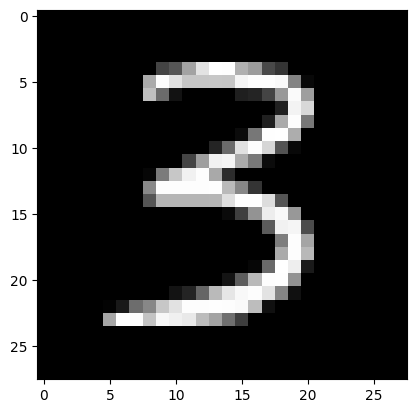

In [114]:
x_test_reshaped_for_plotting = np.reshape(x_test, (28000, 28, 28))
plt.imshow(x_test_reshaped_for_plotting[9], cmap="gray")
#should be a 3
print("Model prediction: ",  np.argmax(model.predict(x_test[9].reshape(1, 784))))

In [115]:
x_train_cv_reshaped = np.reshape(x_train_cv, (1000, 784))
results_cv = model.predict(x_train_cv_reshaped)

32/32 [==============================] - 0s 548us/step


In [116]:
predictions_cv = []
correct = 0
for i in range(len(results_cv)):
    if (np.argmax(results_cv[i]) == y_train_cv[i]):
        correct+=1
correct

957

In [117]:
crossvalidation_score = correct/len(x_train_cv)
print("Cross Validation set score:", crossvalidation_score)

Cross Validation set score: 0.957


In [118]:
x_training_set_reshaped = np.reshape(x_train_cv_removed, (41000, 784))
results_training_set = model.predict(x_training_set_reshaped)
predictions_training_set = []
correct_training_set = 0
for i in range(len(results_training_set)):
    if (np.argmax(results_training_set[i]) == y_train_cv_removed[i]):
        correct_training_set+=1
correct_training_set

1282/1282 [==============================] - 1s 493us/step


40329

In [119]:
training_set_score = correct_training_set/len(x_train_cv_removed)
print("Training set score:", training_set_score)

Training set score: 0.9836341463414634


In [120]:
x_reshaped_for_full_prediction = np.reshape(x_test, (28000, 784))
results = model.predict(x_reshaped_for_full_prediction)

875/875 [==============================] - 0s 545us/step


# 